1.从sklearn库导入逻辑回归模型

logistic回归模型基于logistic函数(sigmoid)函数来建模。此函数将整个实数范围内的输入压缩到0和1之间。sigmoid函数如下所示：

$$
\phi(z)=\frac{1}{1+e^{-z}}
$$

其中z是净输入：

$$
z=\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}=w_{0} x_{0}+w_{1} x_{1}+\cdots+w_{m} x_{m}
$$

logistic回归模型可用以下示意图表示：

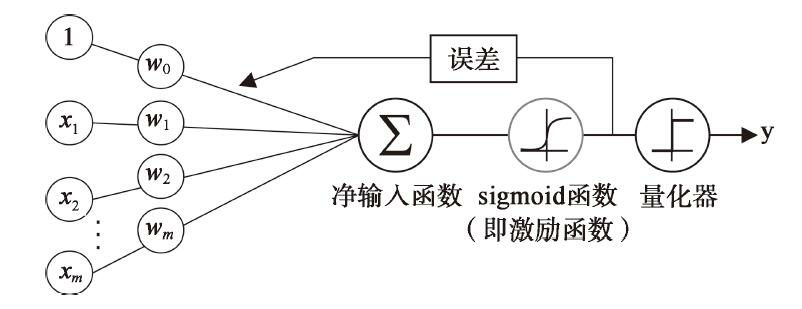

logistic回归模型的另一个优点是可以预测到事情发生的概率。

In [11]:
'''
solver参数定义的是求解模型的权重w的方法。根据L1/L2代价函数的不同，也存在不同的求解拟合参数的方法。
solver->{'newton-cg','lbfgs','liblinear','sag'}分别对应于四种最优化的算法。
'''
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', C=1000.0, random_state=0, solver='sag', max_iter=1000, multi_class='ovr')

（1）如果数据集比较小，那么利用'liblinear'就可以啦；  
（2）sag在处理大数据集时速度更快；  
（3）如果不是二分类，而是多种类型的区分，那么liblinear就不适合了，只能用剩下的三种了；  
（4）'newton-cg','lbfgs','sag'这三种solver只可以处理代价函数是L2的情形；  
（5）在使用 ‘sag’方法时，最好将各个特征的取值利用sklearn.preprocessing先处理为数量级是一个范围的，比如都为0-1之间的，这样才能有效的保证sag方法在使用时具有较快的收敛速度。

2.导入鸢尾花数据集并且按7:3的比例划分为训练集和测试集

In [12]:
from sklearn.model_selection import train_test_split # 新版本的sklearn库中sklearn.cross_validation库被抛弃，改成model_selection
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # 取花瓣长度和花瓣宽度两个特征值
y = iris.target # 鸢尾花数据集有150个数据，在sklearn库中已经定义好了稀疏化的标签0，1，2
np.unique(y) # np.unique()函数可以将数组中重复的值去掉

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


3.对数据集做归一化处理

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # 对测试集做标准化处理时，要用训练集计算得到均值和和标准差
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

4.将数据集送入逻辑回归模型训练并且绘制决策区域

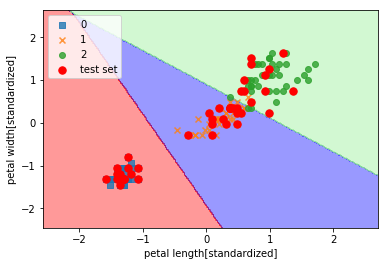

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ['s','x', 'o','^','v']
    colors = ['red', 'blue','lightgreen', 'gray','cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    """
    plot the decision surface
    将最大值，最小值向量生成二维数组xx1,xx2
    np.arange(x1_min, x1_max, resolution) 最小值最大值之间生成序列，步长为resolution
    ---
    """
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    new_x1 = np.arange(x1_min, x1_max, resolution)
    new_x2 = np.arange(x2_min, x2_max, resolution)
    xx1, xx2 = np.meshgrid(new_x1, new_x2)

    # xx1, xx2 = np.meshgrid(np.array(x1_min, x1_max, resolution), np.array(x2_min, x2_max, resolution))
    # 预测值
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) # 绘制等高线(轮廓)，使用不同的颜色对不同区域进行填充，不专门绘制等高线，但不同颜色的分界即可代表等高线
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx ,c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, cmap=cmap, marker=markers[idx], label=c1)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='red', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')
        
        
lr.fit(X_train_std, y_train) # 训练模型
X_combined_std = np.vstack((X_train_std, X_test_std))# 合并数组
y_combined_std = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined_std, classifier=lr, test_idx=range(105,150))
plt.xlabel("petal length[standardized]")
plt.ylabel("petal width[standardized]")
plt.legend(loc="upper left")
plt.show()

In [6]:
print(X_train_std.shape)
print(X_test_std.shape)
lr.predict_proba(X_test_std[0:5, :])

(105, 2)
(45, 2)


array([[2.95313666e-10, 6.12172591e-02, 9.38782741e-01],
       [1.69746527e-03, 9.98180826e-01, 1.21709079e-04],
       [8.15952869e-01, 1.84047131e-01, 1.25743110e-13],
       [2.86451296e-10, 4.15382484e-01, 5.84617515e-01],
       [7.98951348e-01, 2.01048652e-01, 2.04152663e-13]])

(10, 2)


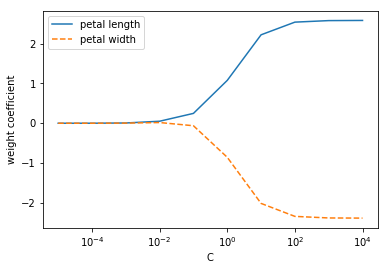

In [17]:
weights, params = [], []

for c in np.arange(-5, 5, dtype=float): # C的参数是控制L2正则化大小的，C越小正则化的强度越大。
    lr = LogisticRegression(C=10**c, random_state=0, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
print(weights.shape)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()